# Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd
import os

### Merge data of each month in single CSV file

In [2]:
files = [file for file in os.listdir("Sales_Data")]   # generate a list of files present in Sales_Data folder

all_months_data = pd.DataFrame()     # create a empty data frame of name all_months_data

for file in files:
    df = pd.read_csv("Sales_Data/" + file)     # loop through files vairable and get a file
    all_months_data = pd.concat([all_months_data,df])    # merge those files data into one data frame inshort merging dataframes
    
all_months_data.to_csv("all_data.csv",index=False)   # transfer dataframe data to a new file



#### Read in updated file

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Up the date


### Drop rows of NAN (null values)

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]   # finding nan(null values), if all_data has any null value horizontally. horizontally here axis=1 means to check horizontally of the table
nan_df.head()

all_data = all_data.dropna(how='all') # drop that row whose all values filled with nan
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### *Get rid of text in order date column*

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']  # delete those rows which having duplicate data all over there rows


#### Convert Column to the correct type

In [6]:
#make int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # below i have use astype() to convert that column into int but here i have use to_numeric() function
#Make float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # same to_numeric() has applied with price each column too

## Augment data with Additional columns

### Add column month

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2] # adding a column here by graping the value from string
all_data['Month'] = all_data['Month'].astype('int32') #converting that string into integer value 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Add Column Month(Alternative Method)

In [8]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add a sales Column 

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] #all_data has created a sales column where it has stored the multiplication value ordered and price of each item
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99


####  Add a city Column

In [10]:
# as we see that cities in data are so into it and we need to get that city name
# so we use apply() here

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# added a city column by applying lambda function 
#lambda function has x value which is getting us to each cell
#get_city function is spliting the column on ',' and getting us value availabe on 1 index
# same concept goes with add a city columns
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) +')' )

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


# Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [12]:
results = all_data.groupby('Month').sum() #addition of columns are done w.r.t months
results

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1.811768e+06,9709,1.822257e+06
2,13449,2.188885e+06,23950,2.202022e+06
3,17005,2.791208e+06,45459,2.807100e+06
4,20558,3.367671e+06,73116,3.390670e+06
5,18667,3.135125e+06,82830,3.152607e+06
6,15253,2.562026e+06,81324,2.577802e+06
7,16072,2.632540e+06,100051,2.647776e+06
8,13448,2.230345e+06,95688,2.244468e+06
9,13109,2.084992e+06,104589,2.097560e+06


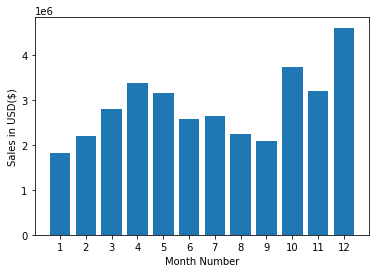

In [13]:
import matplotlib.pyplot as plt

months = range(1,13) # 13 is excluded

plt.bar(months, results['Sales']) # months on y-axis and results on x-axis
plt.xticks(months)  # ticks are showing here
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

#### Question 2: What city had the highest number of sales?

In [14]:
results = all_data.groupby('City').sum()  #groupby on city and sum all the columns
results

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,315520,8.262204e+06


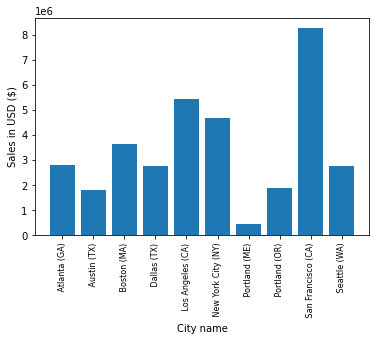

In [15]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')] #this is getting the same value of cities which we grouped by if we don't do this then there will be no consistency among data in graph

plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
# Add hour column
#Order date was in string so we converted in date time. Before we get the our month using slicing
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [17]:
# creating an hour column by getting an hour value from Order Date column
all_data['Hour'] = all_data['Order Date'].dt.hour
# creating a minute column by getting a minute value from Order Date Column
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),9,27


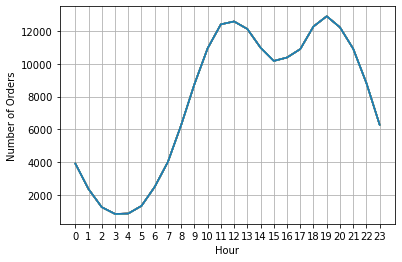

In [18]:
hours = [hour for hour, df in all_data.groupby('Hour')] #same method as we used previous to get the keys of data
    
plt.plot(hours,all_data.groupby(['Hour']).count()) # count all the items by that specific hour
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recomendation is around 11am (11) or 7pm (19)

#### Question 4: What products are most often sold together?

In [19]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)] #keep=false means that all duplicates should be keep
 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # It created a new column grouped and join tow col order id and product and combine them over ,

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df = df[['Order ID','Grouped']].drop_duplicates() # there were two rows created over same data so we dropped additional row

df.head()

<ipython-input-19-3de36d67b4ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # It created a new column grouped and join tow col order id and product and combine them over ,


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter


# we have list of comma seperated values 
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))  # we update the count based on sublists and in the end we get output as dictionary
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [21]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
product_group = all_data.groupby('Product') # data group on product
quantity_ordered = product_group.sum()['Quantity Ordered'] # sum of the products on the base of quantity ordered

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

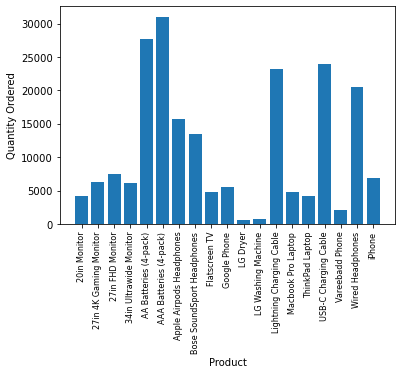

In [22]:
products = [product for product, df in product_group] # for mainting the consistency among data

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [23]:
# printing the price of individual item present in our database
# we want to place this price over our chart of most sale item

prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


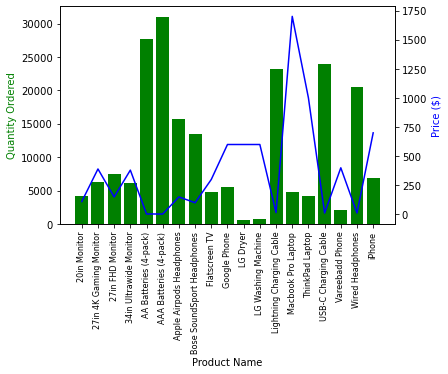

In [24]:
# Adding a y-axis label to secondary y-axis in matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products,prices,'b-')  # b- shows that how the line is goint to be displayed

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()

### Question 6: Show the individual month with sales

In [25]:
each_month = all_data.groupby(['Month', 'Sales']) 
each_month.first()



Order ID                 Product  Quantity Ordered  Price Each  \
Month Sales                                                                    
1     2.99      304165  AAA Batteries (4-pack)                 1        2.99   
      3.84      141253   AA Batteries (4-pack)                 1        3.84   
      5.98      141259  AAA Batteries (4-pack)                 2        2.99   
      7.68      141412   AA Batteries (4-pack)                 2        3.84   
      8.97      315138  AAA Batteries (4-pack)                 3        2.99   
...                ...                     ...               ...         ...   
12    759.98    298137  34in Ultrawide Monitor                 2      379.99   
      779.98    301666  27in 4K Gaming Monitor                 2      389.99   
      999.99    295676         ThinkPad Laptop                 1      999.99   
      1200.00   312867            Google Phone                 2      600.00   
      1700.00   295665      Macbook Pro Laptop                 1     1700.00   

                       Order Date                         Purchase Address  \
Month Sales                                                                  
1     2.99    2020-01-01 04:13:00         825 Adams St, Portland, OR 97035   
      3.84    2019-01-17 00:09:00           385 11th St, Atlanta, GA 30301   
      5.98    2019-01-20 17:26:00    920 Adams St, San Francisco, CA 94016   
      7.68    2019-01-14 17:16:00        397 Dogwood St, Atlanta, GA 30301   
      8.97    2020-01-01 00:51:00    257 Adams St, New York City, NY 10001   
...                           ...                                      ...   
12    759.98  2019-12-18 16:07:00  587 Hickory St, San Francisco, CA 94016   
      779.98  2019-12-29 11:56:00            18 North St, Boston, MA 02215   
      999.99  2019-12-28 17:19:00    410 Lincoln St, Los Angeles, CA 90001   
      1200.00 2019-12-29 12:52:00       305 Hill St, Los Angeles, CA 90001   
      1700.00 2019-12-30 00:01:00   136 Church St, New York City, NY 10001   

               Month 2                 City  Hour  Minute  
Month Sales                                                
1     2.99           1        Portland (OR)     4      13  
      3.84           1         Atlanta (GA)     0       9  
      5.98           1   San Francisco (CA)    17      26  
      7.68           1         Atlanta (GA)    17      16  
      8.97           1   New York City (NY)     0      51  
...                ...                  ...   ...     ...  
12    759.98        12   San Francisco (CA)    16       7  
      779.98        12          Boston (MA)    11      56  
      999.99        12     Los Angeles (CA)    17      19  
      1200.00       12     Los Angeles (CA)    12      52  
      1700.00       12   New York City (NY)     0       1  

[508 rows x 10 columns]